# Tutorial Exercise Solution

The biggest supplier of batteries for e-vehicles is Lithionpower. It offers leasing batteries to owners of electric vehicles. Drivers often hire batteries for one day, returning them with a fully charged battery from the business. Based on a driver's past driving behaviour, Lithionpower uses a variable pricing mechanism. Because a battery's lifespan is affected by things like excessive speeding, daily mileage, etc. Your responsibility is to develop a clusters as a machine learning specialist so that drivers can be grouped together according to driving data.

* <b>id:</b> Unique Id of the driver
* <b>mean_dist_day:</b> Mean distance driven by driver per day
* <b>mean_over_speed_perc:</b> Mean percentage of time a driver was > 5 mph over the speed limit

In [1]:
# importing the libraries fpr arrays, plot and dataframes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# importing the driver dataset with pandas
dataset = pd.read_csv('driver-data.csv')

# Load 2 columns of the driver data values
x = dataset.iloc[:, [1, 2]].values

# Show first five records
dataset.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
# import KMeans library for clustering
from sklearn.cluster import KMeans

# Applying KMeans to the dataset/ Creating the kmeans classifier
kmeans = KMeans(n_clusters = 4, max_iter = 300, n_init = 10, random_state = 38)

# n_initial, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(x)

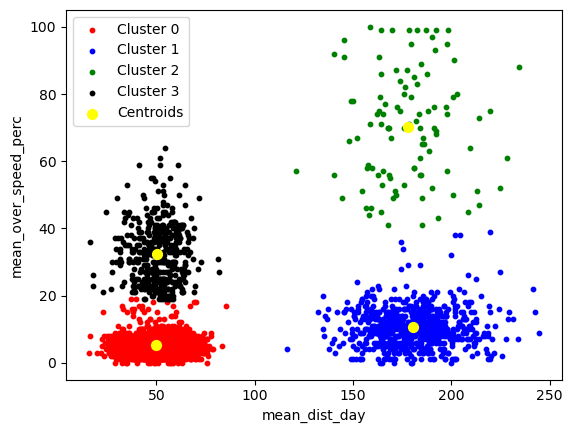

In [4]:
# Visualising the clusters using scatter() method
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 10, c = 'black', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend( loc ="best") 

In [5]:
# import silhouette score from sklearn library
from sklearn.metrics import silhouette_score

# Display the silhouette score values
print(f'Silhouette Score(n = 4): {silhouette_score(x, y_kmeans)}')

Silhouette Score(n = 4): 0.5911323766293183


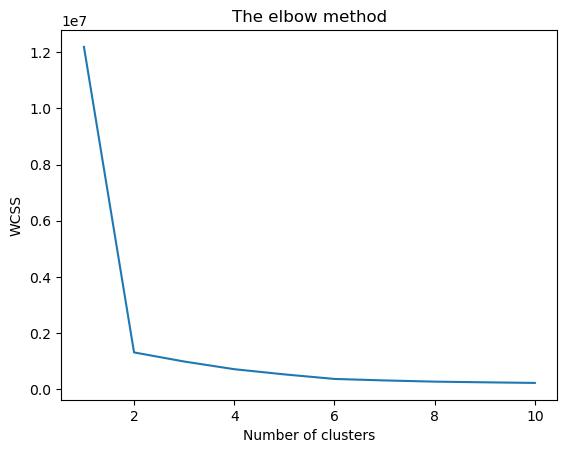

In [6]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

In [7]:
dataset["cluster"] = kmeans.labels_

In [8]:
dataset

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,4
1,3423313212,52.53,25,4
2,3423313724,64.54,27,4
3,3423311373,55.69,22,4
4,3423310999,54.58,25,4
...,...,...,...,...
3995,3423310685,160.04,10,5
3996,3423312600,176.17,5,0
3997,3423312921,170.91,12,5
3998,3423313630,176.14,5,0


## References:
* <p>https://github.com/JangirSumit/kmeans-clustering/tree/master</p>